In [7]:
import numpy as np
import cv2

class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def getX(self):
        
        return self.x
    def getY(self):
        return self.y

def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1),Point(0, -1),Point(1, -1),Point(1, 0),Point(1, 1),Point(0, 1),Point(-1, 1), Point(-1, 0)]
    else:
        connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
    return connects

def regionGrow(img,seeds,thresh,p = 1):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
        label = 1
        connects = selectConnects(p)
        
        while(len(seedList)>0):
            currentPoint = seedList.pop(0)
            seedMark[currentPoint.x,currentPoint.y] = label
            
            for i in range(8):
                tmpX = currentPoint.x + connects[i].x
                tmpY = currentPoint.y + connects[i].y
        
                if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                    continue
                grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
                if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                    seedMark[tmpX,tmpY] = label
                    seedList.append(Point(tmpX,tmpY))
    return seedMark


img = cv2.imread('balls.jpg',0)

seeds = [Point( 86,276),Point(230,119),Point(165, 164),Point(183,276),Point(60,150),Point(151,76),\
         Point(98,66),Point(299,67),Point(82,284),Point(283,274),Point(168,252)]

binaryImg = regionGrow(img,seeds,10)
cv2.imshow(' ',binaryImg)
cv2.waitKey(0)



-1

Seed: 169, 168 255


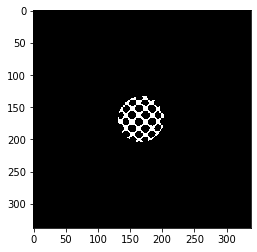

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get8n(x, y, shape):
    out = []
    maxx = shape[1]-1
    maxy = shape[0]-1
    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))
    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))
    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    return out

def region_growing(img, seed):
    list = []
    outimg = np.zeros_like(img)
    list.append((seed[0], seed[1]))
    processed = []
    while(len(list) > 0):
        pix = list[0]
        outimg[pix[0], pix[1]] = 255
        for coord in get8n(pix[0], pix[1], img.shape):
            if img[coord[0], coord[1]] != 0:
                outimg[coord[0], coord[1]] = 255
                if not coord in processed:
                    list.append(coord)
                processed.append(coord)
        list.pop(0)
        cv2.imshow("progress",outimg)
        cv2.waitKey(1)
    return outimg

def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print ('Seed: ' + str(x) + ', ' + str(y), img[y,x])
        clicks.append((y,x))

clicks = []
image = cv2.imread('balls.jpg', 0)
ret, img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
cv2.namedWindow('Input')
cv2.setMouseCallback('Input', on_mouse, 0 ,)
cv2.imshow('Input', img)
cv2.waitKey()
seed = clicks[-1]


out = region_growing(img, seed)
plt.imshow( out , cmap='gray')
plt.show()

        